In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns #for data visualization
import matplotlib.pyplot as plt  #for data visualization
import warnings            
warnings.filterwarnings("ignore") 

In [2]:
!pip install statsmodels 

In [3]:
import statsmodels.api as sm
from scipy import stats

In [4]:
#Covid2019 Effect

In [5]:
#load data from csv file
data_panel2021=pd.read_csv('DataPanelWHR2021C2.csv')
data_2021=pd.read_csv('DataForFigure2.1WHR2021C2.csv')
dfm=pd.read_csv('Happiness_Mortality2021.csv')

In [14]:
data_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country name                  149 non-null    object 
 1   Regional indicator            149 non-null    object 
 2   Ladder score                  149 non-null    float64
 3   Logged GDP per capita         149 non-null    float64
 4   Social support                149 non-null    float64
 5   Healthy life expectancy       149 non-null    float64
 6   Freedom to make life choices  149 non-null    float64
 7   Generosity                    149 non-null    float64
 8   Perceptions of corruption     149 non-null    float64
dtypes: float64(7), object(2)
memory usage: 10.6+ KB


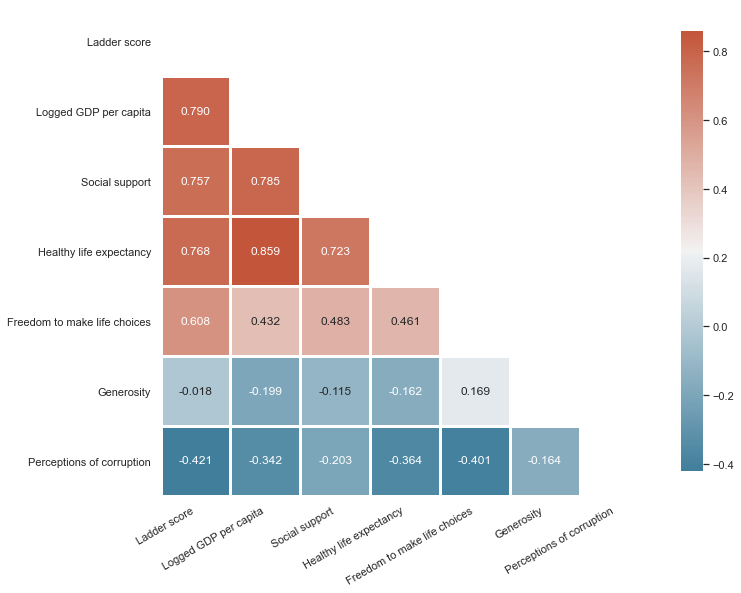

In [20]:
sns.set_theme(style="white")


# Compute the correlation matrix
corr = data_2021.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
ax=sns.heatmap(corr, mask=mask, cmap=cmap,annot=True,  fmt= '.3f',ax=ax,
            square=True, linewidths=2.5, cbar_kws={"shrink": 0.9})

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=30,
    horizontalalignment='right'
);

In [11]:
dfm.head()

,Country name,Regional indicator,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Population 2020,...,Log of average distance to SARS countries,WHO Western Pacific Region,Female head of government,Index of institutional trust,Gini coefficient of income,"All-cause death count, 2017","All-cause death count, 2018","All-cause death count, 2019","All-cause death count, 2020","Excess deaths in 2020 per 100,000 population, relative to 2017-2019 average"
0,Finland,Western Europe,7.842,10.775,0.954,72.0,0.949,-0.098,0.186,5540718.0,...,8.926763,0,1,0.549860,25.9,53546.0,54394.0,53821.0,55663.0,31.510042
1,Denmark,Western Europe,7.620,10.933,0.954,72.7,0.946,0.030,0.179,5792203.0,...,9.006084,0,1,0.571761,27.8,53103.0,55076.0,53805.0,55477.0,25.533773
2,Switzerland,Western Europe,7.571,11.117,0.942,74.4,0.919,0.025,0.292,8654618.0,...,9.078127,0,0,0.660001,30.1,66703.0,66888.0,67515.0,77087.0,116.680031
3,Iceland,Western Europe,7.554,10.878,0.983,73.0,0.955,0.160,0.673,341250.0,...,9.069892,0,1,0.325369,24.1,2229.0,2247.0,2261.0,2321.0,21.445267
4,Netherlands,Western Europe,7.464,10.932,0.942,72.4,0.913,0.175,0.338,17134873.0,...,9.059903,0,0,0.522208,27.0,149805.0,152991.0,151547.0,171175.0,114.468414


In [12]:
dfm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 25 columns):
 #   Column                                                                       Non-Null Count  Dtype  
---  ------                                                                       --------------  -----  
 0   Country name                                                                 148 non-null    object 
 1   Regional indicator                                                           148 non-null    object 
 2   Ladder score                                                                 148 non-null    float64
 3   Logged GDP per capita                                                        148 non-null    float64
 4   Social support                                                               148 non-null    float64
 5   Healthy life expectancy                                                      148 non-null    float64
 6   Freedom to make life choices              

In [16]:
columns_list = [9,10,12,13,14,15,16,17,18,19,20,21,22,23,24] # index numbers of columns you want to delete

In [17]:
df11=dfm.drop(columns=dfm.columns[columns_list])

In [18]:
df11.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 10 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Country name                                    148 non-null    object 
 1   Regional indicator                              148 non-null    object 
 2   Ladder score                                    148 non-null    float64
 3   Logged GDP per capita                           148 non-null    float64
 4   Social support                                  148 non-null    float64
 5   Healthy life expectancy                         148 non-null    float64
 6   Freedom to make life choices                    148 non-null    float64
 7   Generosity                                      148 non-null    float64
 8   Perceptions of corruption                       148 non-null    float64
 9   COVID-19 deaths per 100,000 population in 2

In [19]:
df11.corr()

,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,"COVID-19 deaths per 100,000 population in 2020"
Ladder score,1.000000,0.791078,0.757615,0.766723,0.603870,-0.026781,-0.423878,0.438427
Logged GDP per capita,0.791078,1.000000,0.785132,0.868286,0.432119,-0.202664,-0.342702,0.481677
Social support,0.757615,0.785132,1.000000,0.729034,0.482476,-0.118507,-0.203608,0.424535
Healthy life expectancy,0.766723,0.868286,0.729034,1.000000,0.452596,-0.181309,-0.371517,0.483030
Freedom to make life choices,0.603870,0.432119,0.482476,0.452596,1.000000,0.161242,-0.404567,0.151787
Generosity,-0.026781,-0.202664,-0.118507,-0.181309,0.161242,1.000000,-0.165518,-0.243690
Perceptions of corruption,-0.423878,-0.342702,-0.203608,-0.371517,-0.404567,-0.165518,1.000000,0.087388
"COVID-19 deaths per 100,000 population in 2020",0.438427,0.481677,0.424535,0.483030,0.151787,-0.243690,0.087388,1.000000


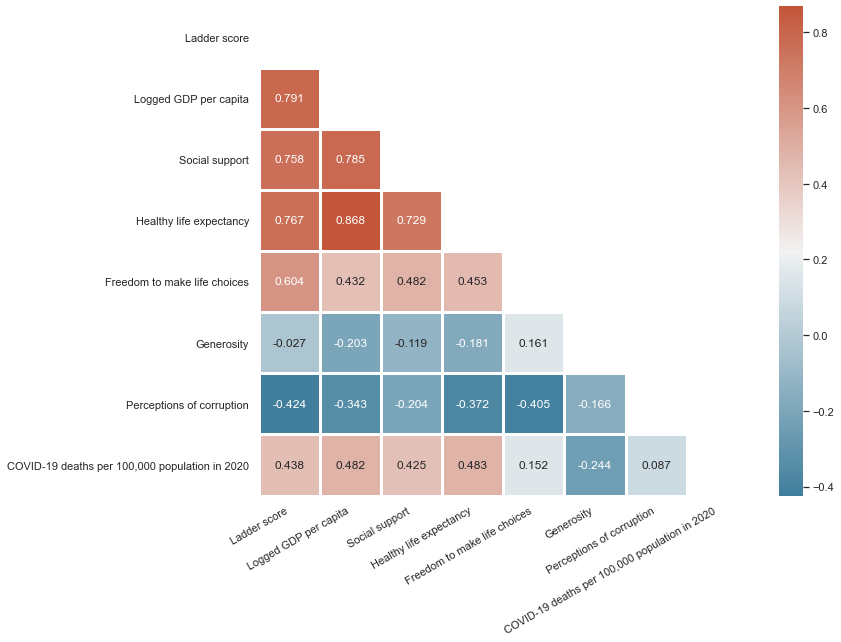

In [20]:
sns.set_theme(style="white")


# Compute the correlation matrix
corr = df11.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))



# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
ax=sns.heatmap(corr, mask=mask, cmap=cmap,annot=True,  fmt= '.3f',ax=ax,
            square=True, linewidths=2.5, cbar_kws={"shrink": 1})

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=30,
    horizontalalignment='right'
);

In [28]:
columns_list1 = [0,1,10,11,13,14,15,16,17,18,19,20,21,22,23,24] # index numbers of columns you want to delete